## What are we going to see in this kernel?
* Since the memory of the dataset are too large and need to much time to run them. I try to reduce memory consumption of dataframes


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

In [ ]:
df_train = pd.read_csv('../input/train.csv')
df_members = pd.read_csv('../input/members.csv')
df_transactions = pd.read_csv('../input/transactions.csv')
#df_sample = pd.read_csv('../input/sample_submission_zero.csv')
#df_user_logs_1 = pd.read_csv('../input/user_logs.csv'), chunksize = 500)
#df = pd.concat(df_user_logs_1, ignore_index=True)

# Any results you write to the current directory are saved as output.

# Memory Reduction

**members.csv**


In [ ]:
#--- Displays members column memory consumed  ---
print(df_members.memory_usage().sum()/1023**2,"MB")

In [ ]:
#--- List the columns with missing values ----
df_members.isnull().values.any()

In [ ]:
df_members.columns[df_members.isnull().any()].tolist()

In [ ]:
#--- Check the datatypes of each columns in members.cvs ---
df_members.dtypes

In [ ]:
df_members.head()

In [ ]:
#--- members columns name ---#
df_members.columns

* Since 'registration_init_time' and 'expiration_date' columns are not datetime type. First, we will split them based on *year*, *month*, and *date* in order to convert it to more convinent type for us in the later data analysis.

In [ ]:
df_members['registration_init_year'] = df_members['registration_init_time'].apply(lambda x: int(str(x)[:4]))
df_members['registration_init_month'] = df_members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
df_members['registration_init_date'] = df_members['registration_init_time'].apply(lambda x: int(str(x)[-2:]))

In [ ]:
df_members['expiration_date_year'] = df_members['expiration_date'].apply(lambda x: int(str(x)[:4]))
df_members['expiration_date_month'] = df_members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
df_members['expiration_date_date'] = df_members['expiration_date'].apply(lambda x: int(str(x)[-2:]))

In [ ]:
#--- Check the change of the df_members after we split two columns. ---#
df_members.head()

In [ ]:
#--- Let check the memory consumption of the df_members now ---#
print(df_members.memory_usage().sum()/1023**2,"MB")

* Woooo! It become larger than before. No panic, let us reduce the df_members memory consumption from now.

In [ ]:
#--- Now drop no needed date columns ---#
df_members = df_members.drop('registration_init_time', 1)
df_members = df_members.drop('expiration_date', 1)

In [ ]:
#--- df_members memory consumption after drop two no needed columns ---#
print(df_members.memory_usage().sum()/1023**2,"MB")

In [ ]:
df_members.columns

In [ ]:
#--- Check the max and min value of each columns wich datatype is int64 by default ---#
df_members.describe().astype(int)

As outputs shows above and the form shows below, I will assign the columns more appropriate datatype.
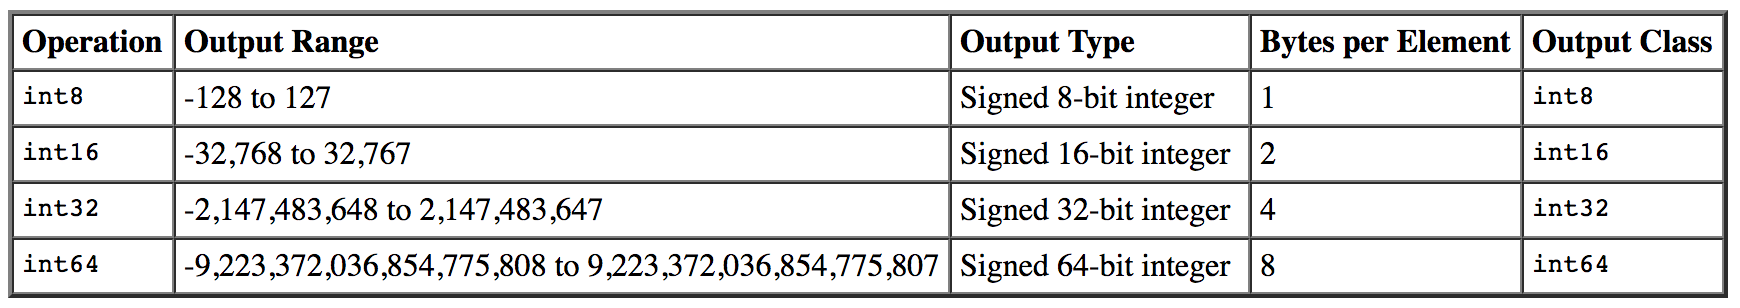

In [ ]:
df_members['city'] = df_members['city'].astype(np.int8)
df_members['bd'] = df_members['bd'].astype(np.int16)
df_members['registered_via'] = df_members['registered_via'].astype(np.int8)
df_members['registration_init_year'] = df_members['registration_init_year'].astype(np.int16)
df_members['registration_init_month'] = df_members['registration_init_month'].astype(np.int8)
df_members['registration_init_date'] = df_members['registration_init_date'].astype(np.int8)
df_members['expiration_date_year'] = df_members['expiration_date_year'].astype(np.int16)
df_members['expiration_date_month'] = df_members['expiration_date_month'].astype(np.int8)
df_members['expiration_date_date'] = df_members['expiration_date_date'].astype(np.int8)

In [ ]:
#--- df_members memory consumption after change them to appropriate datatype ---#
print(df_members.memory_usage().sum()/1023**2,"MB")

* Done! Chane the df_members memory consumption to 137 MB from 273 MB.

**train.csv**

In [ ]:
df_train.head()

In [ ]:
df_train.isnull().values.any()

In [ ]:
df_train.dtypes

In [ ]:
print(df_train.memory_usage(index=True).sum()/ 1024**2," MB")

In [ ]:
df_train['is_churn'] = df_train['is_churn'].astype(np.int8)
print(df_train.memory_usage(index=True).sum()/ 1024**2," MB")

* The train.csv file has been reduced from 15MB to 8MB.

* Then **transactions.csv**

In [ ]:
df_transactions = pd.read_csv('../input/transactions.csv')

In [ ]:
df_transactions.head()

In [ ]:
print(df_transactions.memory_usage(index=True).sum()/ 1024**2," MB")

* df_transactions consuming 1.4GB.

In [ ]:
df_transactions.isnull().values.any()

In [ ]:
df_transactions.dtypes

In [ ]:
df_transactions['payment_method_id'] = df_transactions['payment_method_id'].astype(np.int8)
df_transactions['payment_plan_days'] = df_transactions['payment_plan_days'].astype(np.int16)
df_transactions['plan_list_price'] = df_transactions['plan_list_price'].astype(np.int16)
df_transactions['actual_amount_paid'] = df_transactions['actual_amount_paid'].astype(np.int16)
df_transactions['is_auto_renew'] = df_transactions['is_auto_renew'].astype(np.int8)
df_transactions['is_cancel'] = df_transactions['is_cancel'].astype(np.int8)

* Here we have two date columns as well of type integer. We proceed as before.

In [ ]:
df_transactions['transaction_date_year'] = df_transactions['transaction_date'].apply(lambda x: int(str(x)[:4]))
df_transactions['transaction_date_month'] = df_transactions['transaction_date'].apply(lambda x: int(str(x)[4:6]))
df_transactions['transaction_date_date'] = df_transactions['transaction_date'].apply(lambda x: int(str(x)[-2:]))

df_transactions['membership_expire_date_year'] = df_transactions['membership_expire_date'].apply(lambda x: int(str(x)[:4]))
df_transactions['membership_expire_date_month'] = df_transactions['membership_expire_date'].apply(lambda x: int(str(x)[4:6]))
df_transactions['membership_expire_date_date'] = df_transactions['membership_expire_date'].apply(lambda x: int(str(x)[-2:]))

* Now we assign different datatypes as appropriate to the newly created columns.

In [ ]:

df_transactions['transaction_date_year'] = df_transactions['transaction_date_year'].astype(np.int16)
df_transactions['transaction_date_month'] = df_transactions['transaction_date_month'].astype(np.int8)
df_transactions['transaction_date_date'] = df_transactions['transaction_date_date'].astype(np.int8)

df_transactions['membership_expire_date_year'] = df_transactions['membership_expire_date_year'].astype(np.int16)
df_transactions['membership_expire_date_month'] = df_transactions['membership_expire_date_month'].astype(np.int8)
df_transactions['membership_expire_date_date'] = df_transactions['membership_expire_date_date'].astype(np.int8)


In [ ]:
#--- Now drop no needed columns ---
df_transactions = df_transactions.drop('transaction_date', 1)
df_transactions = df_transactions.drop('membership_expire_date', 1)

In [ ]:
df_transactions.head()

In [ ]:
print(df_transactions.memory_usage(index=True).sum()/ 1024**2," MB")